In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import time
from datetime import datetime 

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
## Loading the train_data
train = pd.read_csv('train.csv')

In [4]:
train.head(1)

,msno,is_churn
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1


In [5]:
train.shape

(992931, 2)

In [6]:
## Loading the members table 
members = pd.read_csv('members_v3.csv')
members.head(1)

,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,20110911


In [7]:
## Loading the transaction logs file 
transaction_logs = pd.read_csv("transactions.csv")
transaction_logs.head(1)

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,1,20150930,20151101,0


In [8]:
## Loading 20M rows Due RAM constraints 
user_logs_rows = pd.read_csv('user_logs.csv',nrows=20000000)
user_logs_rows.head(1)

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,rxIP2f2aN0rYNp+toI0Obt/N/FYQX8hcO1fTmmy2h34=,20150513,0,0,0,0,1,1,280.335


## What percent of customer churns ?

In [13]:
## Lets find the churn rate 
churn_rate  = train.is_churn.value_counts()/len(train)
churn_rate

0    0.936077
1    0.063923
Name: is_churn, dtype: float64

### About 93.6% of customer stayed and 6.3% of churned 

In [10]:
members.shape

(6769473, 6)

In [36]:
## Calculate the number of null values
members.isnull().sum()

msno                            0
city                            0
bd                              0
gender                    4429505
registered_via                  0
registration_init_time          0
dtype: int64

#### 4429505   data points are NULL for gender class

In [38]:
print(f'percentage of null_value:{(members.gender.isnull().sum()/members.shape[0])*100}')

percentage of null_value:65.43352783887313


*  NULL values are present only gender column
* 65% of the values are NULL in gender column

###  Q) Which payment method is used by the maximum number of customer ?

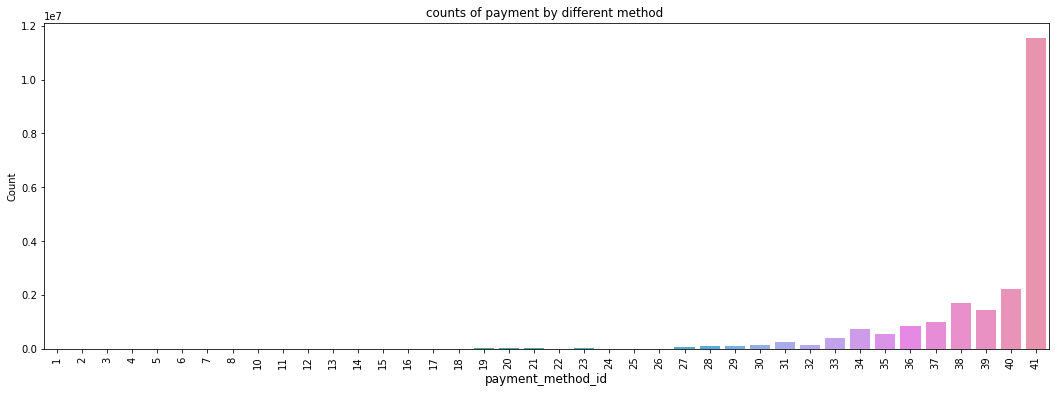

In [39]:
plt.figure(figsize=(18,6))
sns.countplot(x="payment_method_id", data=transaction_logs)
plt.ylabel('Count', fontsize=10)
plt.xlabel('payment_method_id', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("counts of payment by different method ", fontsize=12)
plt.show()

* Maximum number of payments are done by method "41"

### In which payment method maximum number of customer churns ?

In [9]:
## Merging the train data and transaction data 
train_transaction_logs = pd.merge(train,transaction_logs,on='msno',how='left')

In [10]:
train_transaction_logs.head(1)

,msno,is_churn,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,38,7,0,0,0,20161031,20161107,0


is_churn,0,1,Ratio
payment_method_id,,,
2,7,3,NaN
3,36,15,0.090422
4,1,1,0.097617
5,60,7,0.096048
6,45,17,0.094143
8,141,35,0.107112
10,1058,0,0.100202
11,1857,0,0.091832
12,619,214,0.107660


<Figure size 1296x432 with 0 Axes>

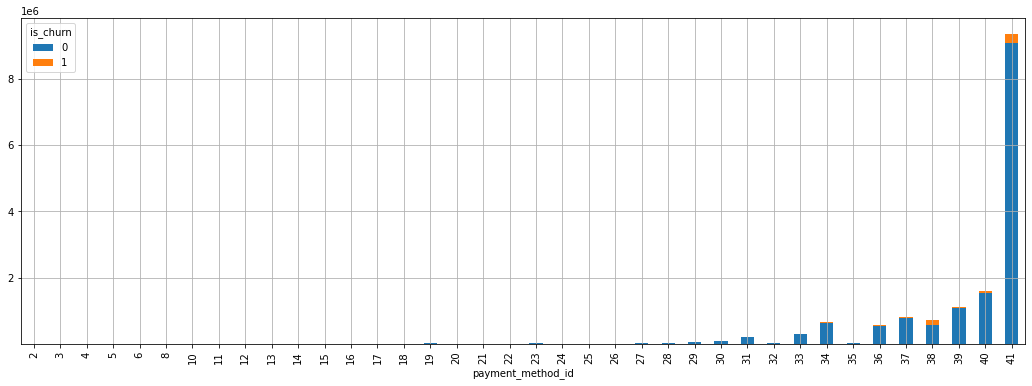

In [85]:
plt.figure(figsize=(18,6))
tran_crosstab=pd.crosstab(train_transaction_logs['payment_method_id'],train_transaction_logs['is_churn'])
tran_crosstab.plot(kind='bar', stacked=True, grid=True,figsize=(18,6))
tran_crosstab["Ratio"] =  city_crosstab[1] / city_crosstab[0]
tran_crosstab

### Q) How many days_plan is being used by  maximum number of  customers ?

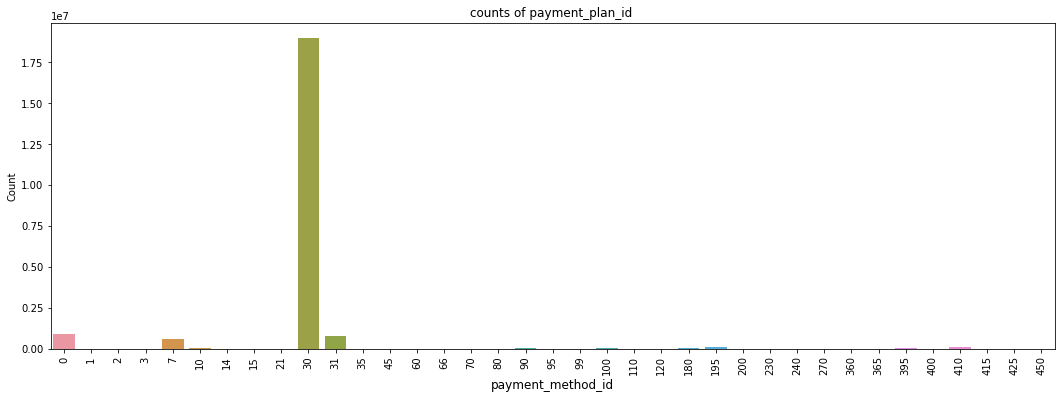

In [40]:
plt.figure(figsize=(18,6))
sns.countplot(x="payment_plan_days", data=transaction_logs)
plt.ylabel('Count', fontsize=10)
plt.xlabel('payment_method_id', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("counts of payment_plan_id ", fontsize=12)
plt.show()

* Maximum number of people takes 30 days plan 

* As we have seen that data of same user listening to different numbers of song on different day 


   ###  Q) In which plan churn rate is Maximum ?

In [ ]:
all_Plans =  train_transaction_logs['payment_plan_days'].unique()

### Q)   Which gender churned more ?

In [16]:
## Merging the train data and members data 
train_member = pd.merge(train,members,on='msno',how='left')

In [17]:
train_member.head(-1)

,msno,is_churn,city,bd,gender,registered_via,registration_init_time
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,18.0,36.0,female,9.0,20050406.0
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,10.0,38.0,male,9.0,20050407.0
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1,11.0,27.0,female,9.0,20051016.0
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1,13.0,23.0,female,9.0,20051102.0
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1,3.0,27.0,male,9.0,20051228.0
...,...,...,...,...,...,...,...
992925,+vvehvMxda8/6O4Yf+Aq9PELkx5mlsb1wtcuTb9PsR4=,0,NaN,NaN,NaN,NaN,NaN
992926,tUM0yxAj50Vc35vQZ++xMlomdyeLJUW9lEcoPnt3H+g=,0,12.0,24.0,male,4.0,20170201.0
992927,KQS8etmfGgvE/7Y9gK+E9wdLnRTI0lyyPXaXL3I8E4c=,0,15.0,17.0,female,4.0,20170210.0
992928,8/jDLgNREuWI9hcKVYp8723nmavn01T+AuMWkK3uM7g=,0,NaN,NaN,NaN,NaN,NaN


In [61]:
def change(x):
    if x=='female':
        return 0
    elif x=='male':
        return 1


In [62]:
Gender = train_member['gender']
converted = Gender.map(change) 
train_member['gender'] = converted

In [63]:
train_member.head(5)

,msno,is_churn,city,bd,gender,registered_via,registration_init_time
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,18.0,36.0,0.0,9.0,20050406.0
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,10.0,38.0,1.0,9.0,20050407.0
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1,11.0,27.0,0.0,9.0,20051016.0
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1,13.0,23.0,0.0,9.0,20051102.0
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1,3.0,27.0,1.0,9.0,20051228.0


In [65]:
train_member.shape

(992931, 7)

[]

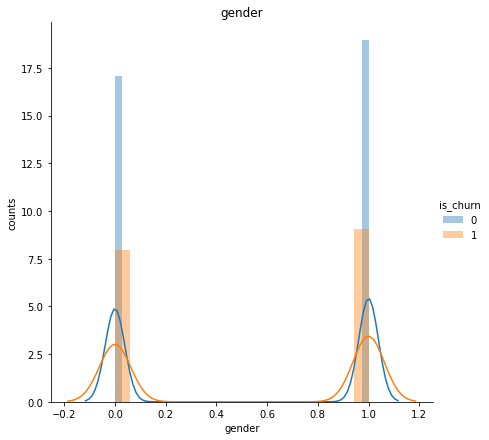

In [67]:
sns.FacetGrid(train_member,hue="is_churn",size=6) \
    .map(sns.distplot,"gender") \
    .add_legend();
plt.title("gender")
plt.ylabel("counts")
plt.plot()

* There is not much difference in the churn rate of male and female 


In [71]:
train_member.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,18.0,36.0,0.0,9.0,20050406.0
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,10.0,38.0,1.0,9.0,20050407.0
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1,11.0,27.0,0.0,9.0,20051016.0
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1,13.0,23.0,0.0,9.0,20051102.0
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1,3.0,27.0,1.0,9.0,20051228.0


### Q) Whats the main age group of customers ?

Text(0, 0.5, 'Age')

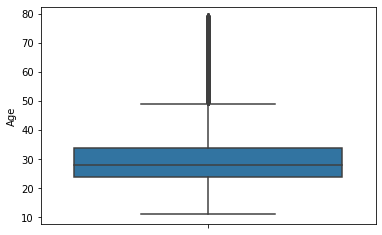

In [47]:
age_member =train_member.bd[(train_member.bd > 10 )& (train_member.bd < 80)] 
sns.boxplot(y = age_member, data = train_member)
plt.ylabel('Age')

* The majority customer  age group of customers are 25 to 35 


### Q) Which age group of customers churn more ?

Text(0.5, 1.0, 'Age Churn Rate')

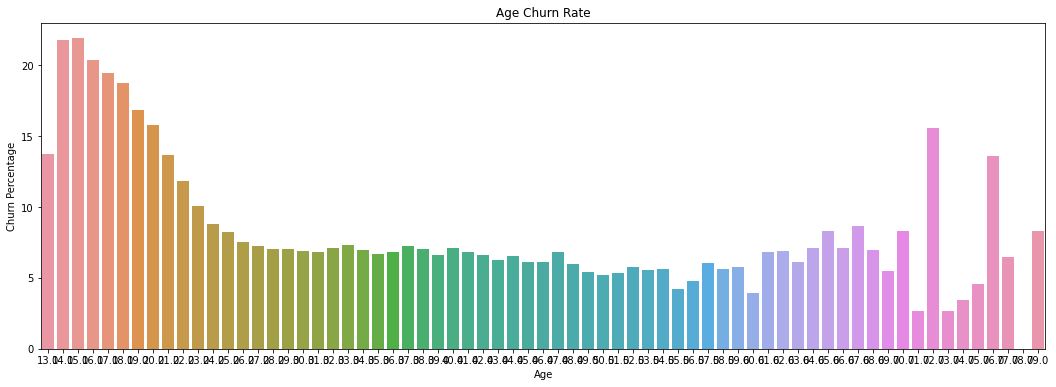

In [48]:
plt.figure(figsize=(18,6))
age_group = train_member[(train_member.bd>12)& (train_member.bd<80)]
b = age_group.groupby(['bd','is_churn'])['msno'].count().reset_index()
b = pd.pivot_table(b, values='msno', index='bd',columns=['is_churn'])
b['churn_percentage'] = (b[1]/(b[0] + b[1]))*100
b = b.reset_index()
sns.barplot(x = 'bd', y = 'churn_percentage',data = b)
plt.xlabel('Age')
plt.ylabel('Churn Percentage')
plt.title('Age Churn Rate')

* Younger people and older poeple are more likely to churn 


##  Q.) Which city has the largest number of customer ?

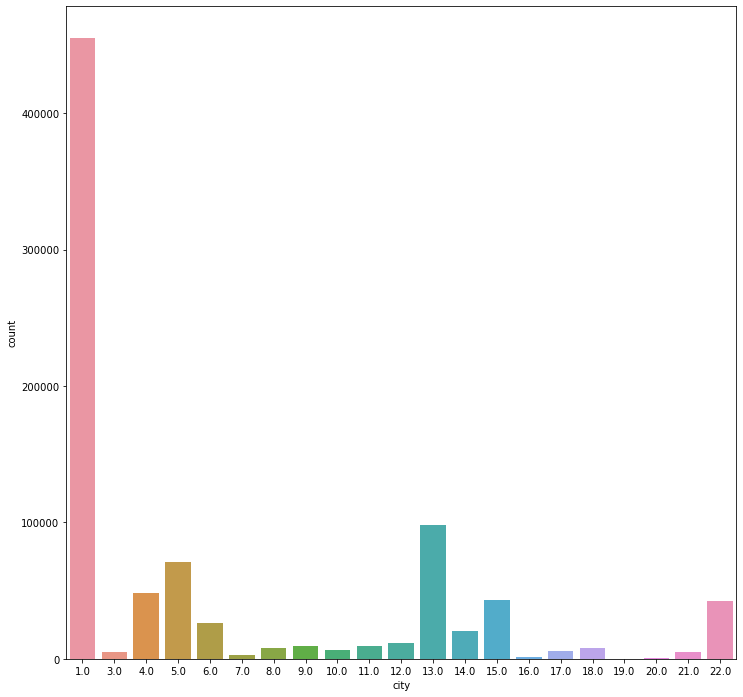

In [72]:
plt.figure(figsize=(12,12))
sns.countplot(x='city',data=train_member)
plt.show()

* City 1 has largest nuber of customer 
* City 20 has smallest number of customer



## Q.) Which city maximum number of customer churn  ?

is_churn,0,1,Ratio
city,,,
1.0,433343,22046,0.050874
3.0,4667,422,0.090422
4.0,43681,4264,0.097617
5.0,65051,6248,0.096048
6.0,23783,2239,0.094143
7.0,2480,186,0.075000
8.0,6946,744,0.107112
9.0,8790,768,0.087372
10.0,5938,595,0.100202


<Figure size 1296x432 with 0 Axes>

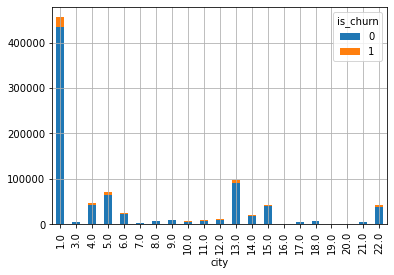

In [73]:
plt.figure(figsize=(18,6))
city_crosstab=pd.crosstab(train_member['city'],train_member['is_churn'])
city_crosstab.plot(kind='bar', stacked=True, grid=True)
city_crosstab["Ratio"] =  city_crosstab[1] / city_crosstab[0]
city_crosstab 

In [74]:
city_crosstab[city_crosstab['Ratio']<0.085] ## Choosing a random threshold to find results 

is_churn,0,1,Ratio
city,,,
1.0,433343,22046,0.050874
7.0,2480,186,0.075000
17.0,5130,416,0.081092
19.0,130,10,0.076923


### The maximum churn is from city 1,7,17,19

### Q)Whats the trend of churn every year ?

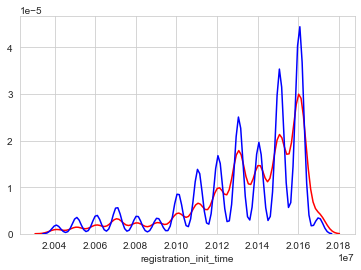

In [71]:
## Finding the inights of 
sns.set_style('whitegrid') 
sns.distplot(train_data['registration_init_time'][train_data['is_churn']==1],hist = False, color ='red') 
sns.distplot(train_data['registration_init_time'][train_data['is_churn']==0], hist= False, color ='blue') 

* Every year the max value of churn is increasing 


### Q) Is there any relationship between  customer churn and auto_renew ?

Text(0.5, 1.0, 'is_auto_renew count')

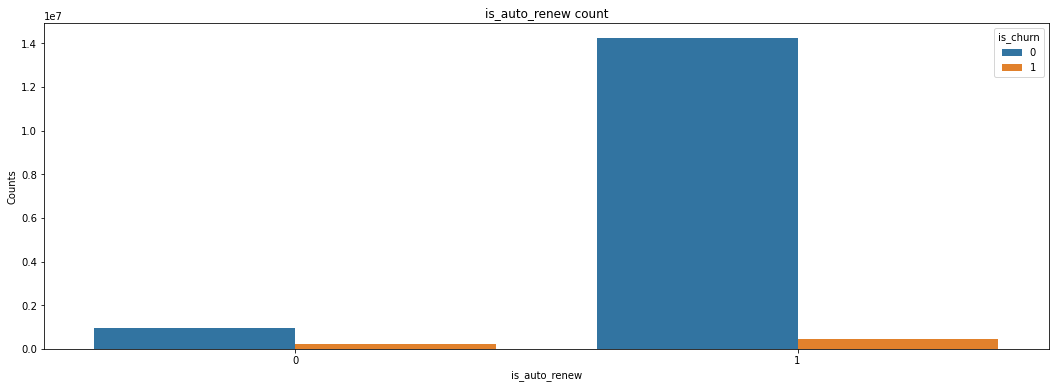

In [28]:
plt.figure(figsize=(18,6))
sns.countplot(x='is_auto_renew',hue='is_churn',data=train_transaction_logs)
plt.xlabel('is_auto_renew')
plt.ylabel('Counts')
plt.title('is_auto_renew count')



* People who has not enabeled the auto_renew mode are more likely to churn  , as compared to people who use auto_renew 

### Q) Whats the day-wise , monthly and yearly trends registration  ?

In [18]:
train_member.head(1)

,msno,is_churn,city,bd,gender,registered_via,registration_init_time
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,18.0,36.0,female,9.0,20050406.0


In [25]:
## Convert the registration time to yyyy/mm/dd Format 
train_member['registration_init_time'] = train_member.registration_init_time.apply(lambda x: datetime.strptime(str(int(x)), "%Y%m%d").date() if pd.notnull(x) else "NAN" )

In [27]:
train_member.head(1)

,msno,is_churn,city,bd,gender,registered_via,registration_init_time
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,18.0,36.0,female,9.0,2005-04-06


Text(0.5, 1.0, 'year vs Registration')

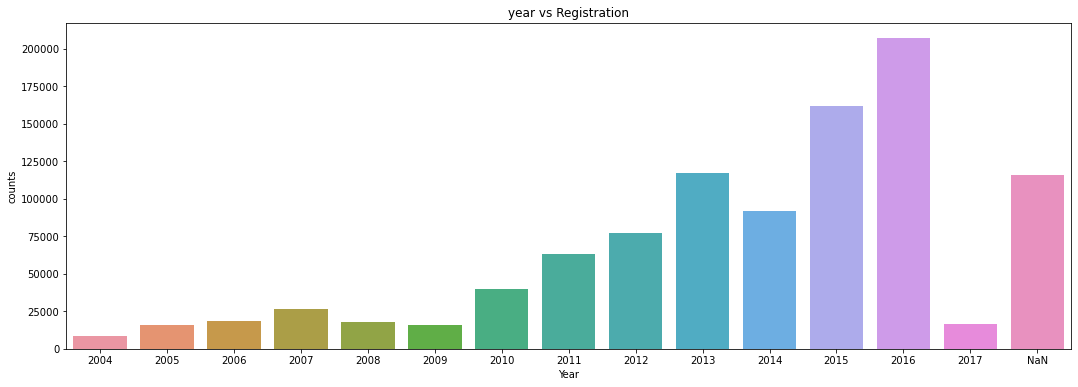

In [57]:
train_member['registration_time_year'] = pd.DatetimeIndex(train_member['registration_init_time']).year
train_member['registration_time_year'] = train_member['registration_time_year'].apply(lambda x: int(x) if pd.notnull(x) else "NaN")
year_count=train_member['registration_time_year'].value_counts()
year_order = train_member['registration_time_year'].unique()
year_order=sorted(year_order, key=lambda x: str(x))
plt.figure(figsize=(18,6))
sns.barplot(year_count.index,year_count.values,order=year_order)
plt.xlabel('Year')
plt.ylabel('counts')
plt.title("year vs Registration")

* Maximum registration were done in 2016 


Text(0.5, 1.0, 'Month vs Registration')

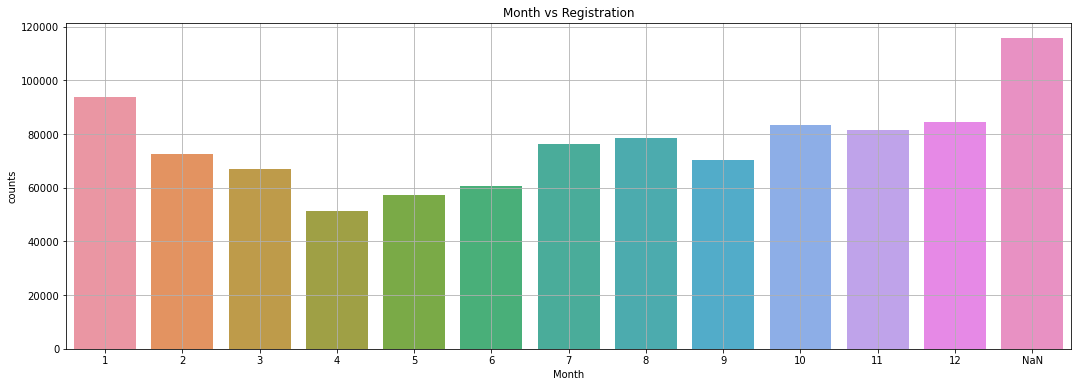

In [64]:
### Monthly registration 

train_member['registration_time_month'] = pd.DatetimeIndex(train_member['registration_init_time']).month
train_member['registration_time_month'] = train_member['registration_time_month'].apply(lambda x: int(x) if pd.notnull(x) else "NaN")
month_count=train_member['registration_time_month'].value_counts()
month_order = train_member['registration_time_month'].unique()
month_order=sorted(month_order, key=lambda x: str(x))
month_order=sorted(month_order, key=lambda x: float(x))

plt.figure(figsize=(18,6))
sns.barplot(month_count.index,month_count.values,order=month_order)
plt.grid()
plt.xlabel('Month')
plt.ylabel('counts')
plt.title("Month vs Registration")

* There is not very much difference in the registration during in any particular month , but if we see there are more than 80000 registration in 1th,10th,11th,12th month of the year 



Text(0.5, 1.0, 'Date vs Registration')

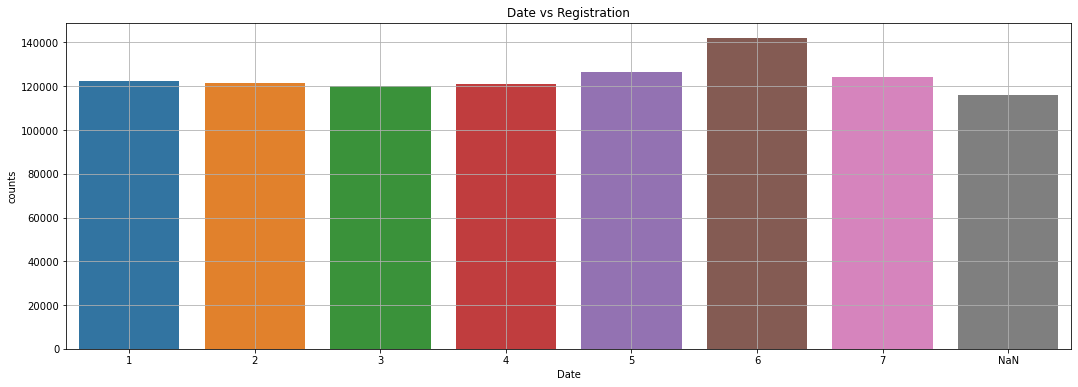

In [72]:
## registration on a particular day 

train_member['registration_time_date'] = pd.DatetimeIndex(train_member['registration_init_time']).dayofweek + 1 
train_member['registration_time_date'] = train_member['registration_time_date'].apply(lambda x: int(x) if pd.notnull(x) else "NaN")
date_count=train_member['registration_time_date'].value_counts()
date_order = train_member['registration_time_date'].unique()
date_order=sorted(date_order, key=lambda x: str(x))
date_order=sorted(date_order, key=lambda x: float(x))

plt.figure(figsize=(18,6))
sns.barplot(date_count.index,date_count.values,order=date_order)
plt.grid()
plt.xlabel('Date')
plt.ylabel('counts')
plt.title("Date vs Registration")

* There is not much difference of registration on particuar week day , but only day 6 has registration above 140000  


### Q) Number of unique songs vs Churning 

In [11]:
train_user_logs = pd.merge(train,user_logs_rows,on='msno',how='left')


[]

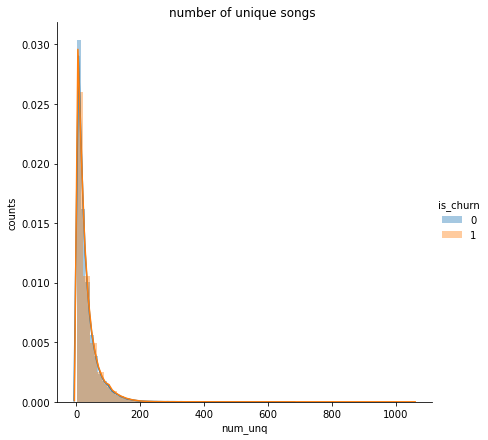

In [19]:
sns.FacetGrid(train_user_logs[:1000000],hue="is_churn",size=6) \
    .map(sns.distplot,"num_unq") \
    .add_legend();
plt.title("number of unique songs ")
plt.ylabel("counts")
plt.plot()

* Majority of the people are listening 0 to 200 unique  songs

[]

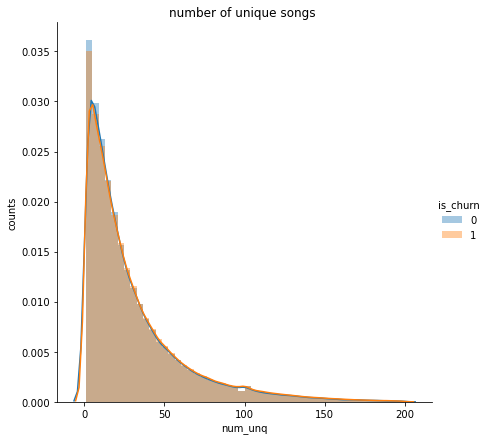

In [22]:
sns.FacetGrid(train_user_logs[(train_user_logs['num_unq']<200)&(train_user_logs['num_unq']>0)][:1000000],hue="is_churn",size=6) \
    .map(sns.distplot,"num_unq") \
    .add_legend();
plt.title("number of unique songs ")
plt.ylabel("counts")
plt.plot()

[]

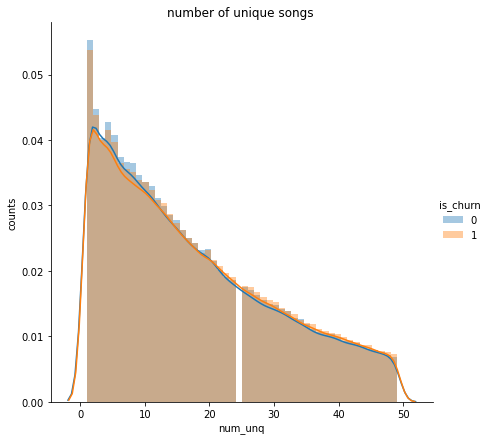

In [24]:
sns.FacetGrid(train_user_logs[(train_user_logs['num_unq']<50)&(train_user_logs['num_unq']>0)][:1000000],hue="is_churn",size=6) \
    .map(sns.distplot,"num_unq") \
    .add_legend();
plt.title("number of unique songs ")
plt.ylabel("counts")
plt.plot()

* Majority of the people are listening 1 to 20 unique songs 

* There is no relationship between listening to unique songs and churning rate of customers because they almost overlaping each other 


### Number of unique songs vs is_churn 

In [31]:
Numer_of_unique_songs_churned = train_user_logs['num_unq'][train_user_logs['is_churn']==1]
Numer_of_unique_songs_stayed =  train_user_logs['num_unq'][train_user_logs['is_churn']==0]

In [33]:
Numer_of_unique_songs_churned = Numer_of_unique_songs_churned[np.logical_not(np.isnan(Numer_of_unique_songs_churned))]
Numer_of_unique_songs_stayed= Numer_of_unique_songs_stayed[np.logical_not(np.isnan(Numer_of_unique_songs_stayed))]


In [35]:
print(f'Median of number of songs played by customer who churned : {np.median(Numer_of_unique_songs_churned)}')
print(f'Median of number of songs played by customer who stayed : {np.median(Numer_of_unique_songs_stayed)}')


Median of number of songs played by customer who churned : 20.0
Median of number of songs played by customer who stayed : 19.0


* There's not much difference between number of unique songs played by customer who churned and customer who stayed 

### observation 

* There is not much difference of registration on particuar week day , but only day 6 has registration above 140000  
* There is not very much difference in the registration during in any particular month , but if we see there are more than 80000 registration in 1th,10th,11th,12th month of the year 
* Maximum registration were done in 2016 
* Every year the max value of churn is increasing 
* City 1 has largest nuber of customer 
* City 20 has smallest number of customer
* Younger people and older poeple are more likely to churn 
* The majority customer  age group of customers are 25 to 35 
* There is not much difference in the churn rate of male and female 
* As we have seen that data of same user listening to different numbers of song on different day 
* About 93.6% of customer stayed and 6.3% of churned
* Maximum number of people takes 30 days plan 
* People who has not enabeled the auto_renew mode are more likely to churn  , as compared to people who use auto_renew 

